<a href="https://colab.research.google.com/github/simonkildare/sigmoidal_data_science/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de **12,1 milhões de pessoas** já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os **golpes financeiros** ultrapassaram a cifra de **R$ 1,8 bilhão de prejuízo por ano** para os últimos 12 meses.

<p align=center>
<img src="https://media.istockphoto.com/photos/secure-credit-card-picture-id155354133?k=20&m=155354133&s=612x612&w=0&h=fxAt15-k5rIekhr1OQUw5Lsnekmz_INtn2hkNg4WVcY=" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acarretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de **falsos positivos**, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Sofrer uma fraude no cartão de crédito é péssimo e pode trazer grandes problemas, pois os golpistas podem gastar o limite do cartão em compras indevidas em poucos minutos. Além disso, o processo para estornar os valores dessas transações pode ser cansativo.

Os criminosos sabem que o cartão de crédito é popular no Brasil: o uso do meio de pagamento em compras na internet e em aplicativos **aumentou 46,5% no 2º trimestre de 2021** em comparação com o mesmo período de 2020.

A informação é da Abecs (Associação Brasileira das Empresas de Cartões de Crédito e Serviços). Segundo a entidade, o **valor total movimentado com crédito foi de R$ 255,2 bilhões** no período analisado.

Não é à toa que **6 a cada 10 brasileiros** caíram em algum tipo de fraude financeira entre julho de 2020 e julho de 2021, segundo a Confederação Nacional de Dirigentes Lojistas (CNDL) e o Serviço de Proteção ao Crédito (SPC) Brasil.

**TIPOS DE FRAUDES COM CARTÕES:**

* Clonagem de cartão;
* Central de atendimento falsa;
* Troca de cartão e roubo de senha.

**COMO EVITAR FRAUDE NO CARTÃO DE CRÉDITO:**

* Tenha cuidado ao usar o cartão físico;
* Não empreste seu cartão para ninguém;
* Confira se o site de compras é verdadeiro e seguro;
* Não anote os dados do cartão ou tire fotos dele;
* Ative notificações de transação e acompanhe o extrato.

Para mais informações, [clique aqui](https://www.bancopan.com.br/blog/publicacoes/tipos-de-fraude-no-cartao-de-credito-como-se-proteger.htm#:~:text=Sofrer%20uma%20fraude%20no%20cart%C3%A3o,dessas%20transa%C3%A7%C3%B5es%20pode%20ser%20cansativo.).


Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

O conjunto de dados foi disponibilizado no site [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud), onde foi realizado o download do mesmo no formato CSV. O Kaggle é uma plataforma online da comunidade de cientistas de dados e machine learning, onde são disponibilizados datasets, resolução de problemas, competições e cursos, de propriedade da Google.

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://www.chargebackgurus.com/hubfs/Credit%20Card%20Fraud%20Detection.png" width="80%"></p>


Também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA). O objetivo é encontrar um meio de condensar a informação contida em várias variáveis originais em um conjunto menor de variáveis estatísticas (componentes) com uma perda mínima de informação.

O PCA foi usado nesse cenário para proteger as informações pessoais dos clientes, por esse motivo, não será possível ter acesso aos rótulos e informações básicas da maioria das variáveis que serão aqui tratadas.

Esses componentes são em número menor ou igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$. As únicas ***features*** que **não** foram transformados com este *framework* são "***Time***" e "***Amount***". 


**Dicionário das Variáveis:**

* `V1, V2..., V27 e V28`: Redução de dimensionalidade (PCA) para proteger a identidade do usuário;

* `Time`: Número de segundos decorridos entre esta transação e a primeira transação no conjunto de dados;

* `Amount`: Valor da transação;

* `Class`: 0 - Transação sem Fraude (Normal) e 1 - Transação com Fraude.




# Importando Bibliotecas

In [1]:
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [2]:
# importar os pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix

from imblearn.under_sampling import RandomUnderSampler

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

Para facilitar a aquisição dos dados, foi criado um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [3]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe

df = pd.read_csv(file_path)

# dimensões do conjunto original
print("Dimensões do Conjunto Original: ", df.shape)



Dimensões do Conjunto Original:  (284807, 31)


Entradas ou Linhas: **284.807**.

Colunas: **31**. 

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.



## Análise Exploratória

Apenas olhando as cinco primeiras entradas é possível tirar algumas conclusões:

* As 5 primeiras entradas permitem entender como a transformação PCA deixou as *features* descaracterizadas (anônimas) e em valores numéricos. Para saber mais sobre PCA, [clique neste *link*](http://www2.ic.uff.br/~aconci/PCA-ACP.pdf).

* As colunas `Time` e `Amount` foram preservadas, mantendo seu valor original.

* A variável alvo está representada na coluna `Class`, onde:
    * **0:** Transação normal; e
    * **1:** Transação fraudulenta;

In [4]:
# ver as primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# ver as últimas entradas
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Exibindo informações iniciais de cada variável.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Vemos das informações iniciais que parece não existir dados faltantes na amostra e que todas as variaveis numéricas foram devidamente reconhecidas como *float*.



Verificando abaixo o resumo estatístico, por meio do método `describe()`, podemos confirmar que as variáveis relativas aos componentes principais (transformação PCA) não têm nenhuma discrepância aparente, bem como a coluna `Time`.

Em relação à variável `Amount`, nota-se que o valor médio de transações (considerando ambas as classes) é 88.34, mediana igual a 22.00 e desvio padrão de 250.12. Atingindo o valor máximo de 25691.16, a maioria das transações financeiras é composta em sua maioria por **quantias menores** - como esperado.

In [7]:
# ver o resumo estatístico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Quanto à qualidade do *dataset*, este não apresentou **nenhum valor ausente** ou que demandasse uma etapa de limpeza. Na função abaixo, perceba que o maior valor por coluna para valores nulos é zero, o que confirma que não há valores ausentes.

In [8]:
# ver se há valores ausentes
df.isnull().sum().max()

0

In [9]:
# quantidade de movimentações com valor zerado

df.query('Amount == 0')['Class'].value_counts()

0    1798
1      27
Name: Class, dtype: int64

Como é [informado na descrição dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), as entradas relativas à transações fraudulentas correspondem a **0,17%** do total.

O gráfico de barras mostra como essa discrepância se torna nítida e visível. Na prática, isso interfere no desempenho do modelo, e será necessário fazer um **balanceamento dos dados** antes de alimentar o modelo final de classificação.


Transacao Normal:  284315

Transacao Fraude:  492

Normais representam 99.8273% do dataset.

Fraudes representam 0.1727% do dataset.



[]

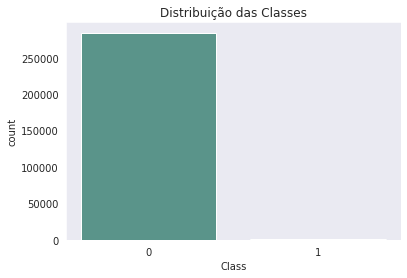

In [10]:
# ver o balanceamento das classes
print('\nTransacao Normal: ', df['Class'].value_counts()[0])
print('\nTransacao Fraude: ', df['Class'].value_counts()[1])
print("\nNormais representam {:.4f}% do dataset.".format((df[df.Class == 0].shape[0] / df.shape[0]) * 100))
print("\nFraudes representam {:.4f}% do dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# plotar gráfico de barras para as Classes
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax, palette='crest')
ax.set_title('Distribuição das Classes')
plt.plot()

Plotou-se também dois gráficos a fim de comparar as distribuições das 2 classes ao longo da dimensão tempo (`Time`). No entanto, não foi identificada nenhuma informação a partir das distribuições de frequência abaixo.

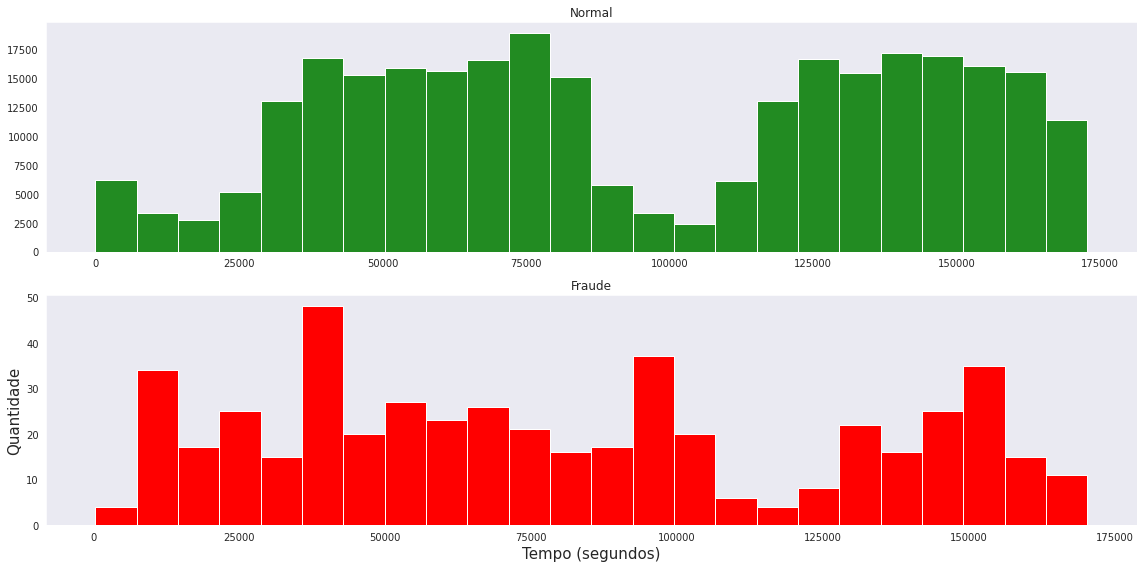

In [11]:
# histograma para o tempo

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,8))

num_bins = 24

cores = {
    'Normal' : 'forestgreen',
    'Fraude' : 'red'
}

ax[0].hist(df.Time[df.Class == 0], bins=num_bins, color=cores.get('Normal'))
ax[0].set_title('Normal')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins, color=cores.get('Fraude'))
ax[1].set_title('Fraude')

plt.xlabel('Tempo (segundos)', fontsize=15)
plt.ylabel('Quantidade', fontsize=15)
plt.tight_layout()

Conforme o gráfico de Fraude acima, podemos verificar que alguns horários chamam mais atenção, como: 1h, 5h, 13h e 21h. 

Uma observação no horário das 13h, pois no gráfico Normal (verde), este horário possui uma movimentação de compra autentica muito baixa. 

De acordo com os gráficos abaixo, observamos que a grande parte das transações são de baixo valor e as com fraude tiveram valores inferiores a 2000.

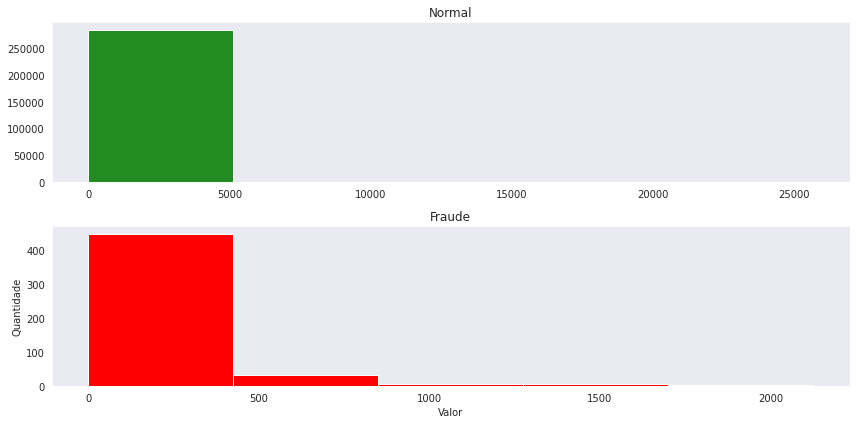

In [12]:
# histograma para os valores

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins = 5

sns.set_palette(cores.values())

ax[0].hist(df.Amount[df.Class == 0], bins=num_bins, color=cores.get('Normal'))
ax[0].set_title('Normal')

ax[1].hist(df.Amount[df.Class == 1], bins=num_bins, color=cores.get('Fraude'))
ax[1].set_title('Fraude')

plt.xlabel('Valor')
plt.ylabel('Quantidade')
plt.tight_layout()

Seguindo a análise exploratória, plotou-se os *boxplots* para ver se há alguma diferença no padrão transações em relação à dimensão `Amount` e também tentando identificar se existe alguma correlação

De uma maneira geral, percebe-se uma distribuição diferente para as duas classes, o que provavelmente irá contribuir para o treinamento do modelo de *machine learning*.

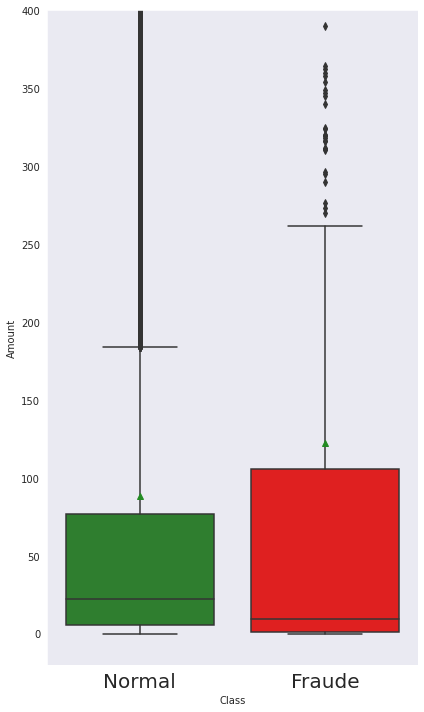

In [13]:
# boxplots de valores

fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.set_palette(cores.values())

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'],fontsize = 20)

plt.tight_layout()

As informações estatísticas para `df.Class == 1` mostram que a sua média está em 118.13 e a mediana em 9.21.

In [14]:
# estatísticas para Fraude

df[(df.Class == 1) & (df.Amount < 2000)]['Amount'].describe()

count     491.000000
mean      118.130550
std       240.439028
min         0.000000
25%         1.000000
50%         9.210000
75%       105.350000
max      1809.680000
Name: Amount, dtype: float64

Analisando a distribuição destes elementos do gráfico, podemos visualizar que a mediana dos valores fraude é inferior ao normal, ou seja, as transações com fraudes são na maioria das vezes com valores baixos, até mesmo para tentar despistar.

O terceiro quartil ou **75% dos movimentos fraudulentos** são inferiores a **$ 106.**

O gráfico de densidade é muito útil para compararmos as distribuições de cada variável para cada classe e ver quais as mais importantes para detecção de anomalias.

Portanto, vamos usar um gráfico de densidade.

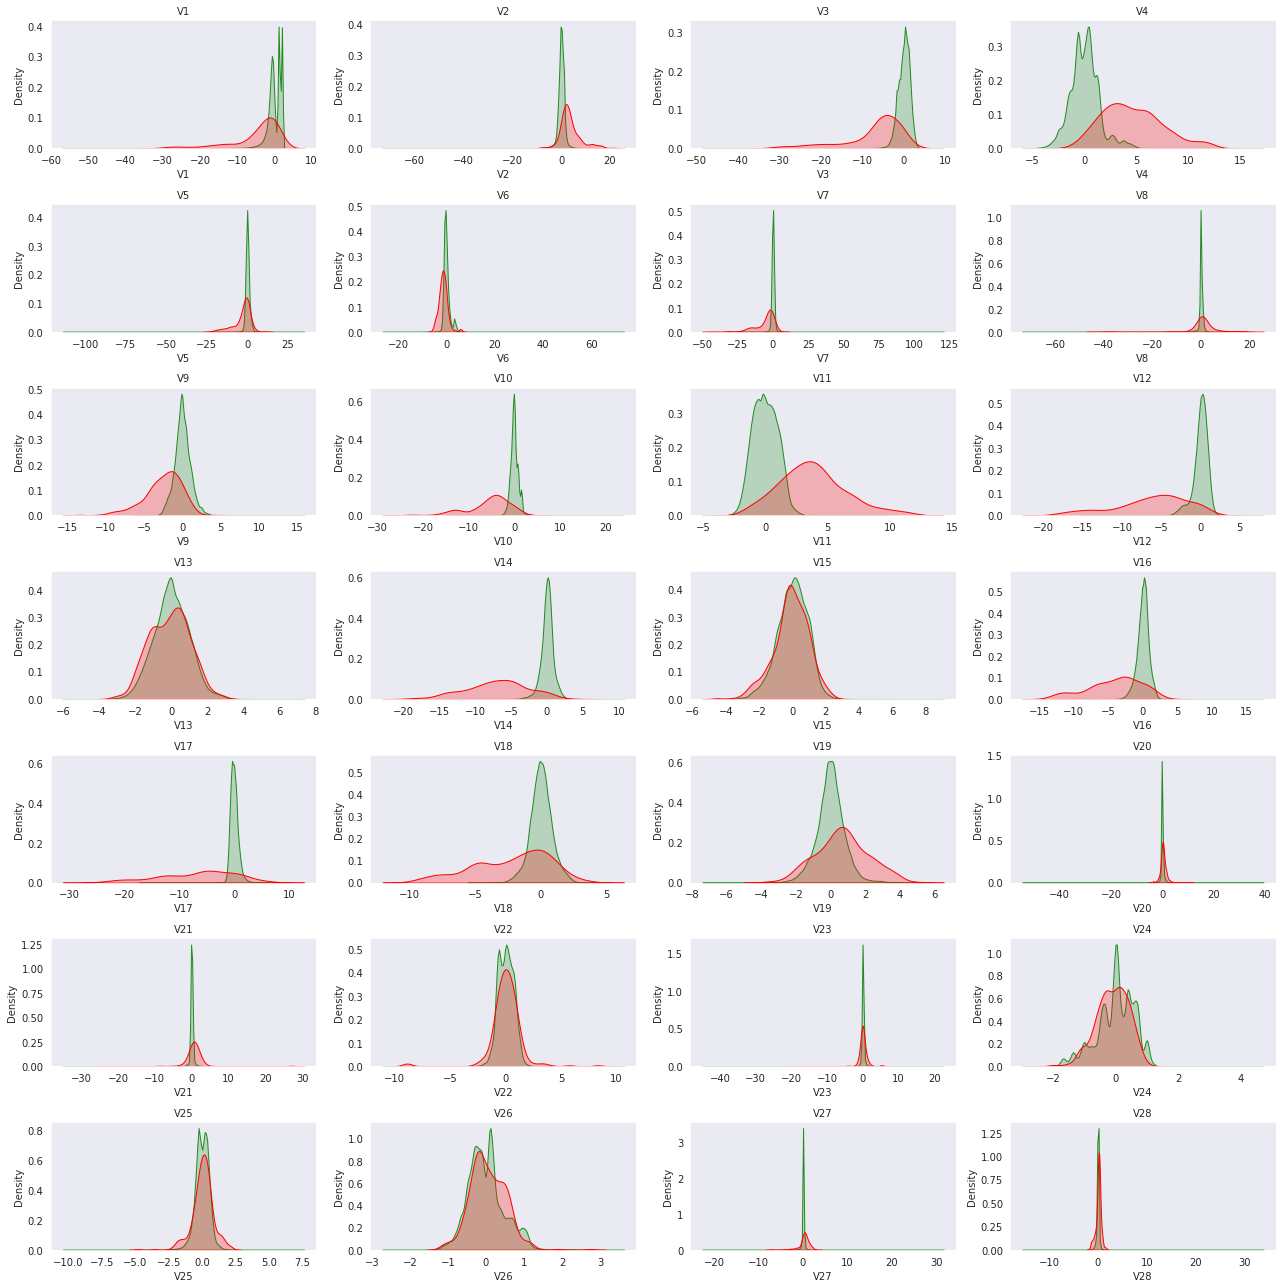

In [15]:
# preparando os dados que serão plotados

column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)

# separando as classes que serão mostrados

df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

# definindo a área de plotagem

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

# plotando gráfico de densidade

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()

Analisando as distribuições, notamos algumas variáveis com o comportamento diferente, e as que mais chamam a atenção são: **V3, V4, V10, V11, V12, V14 e V17**. Observamos uma disperção muito alta da curva vermelha em relação à curva verde.

Resumidamente, algumas observações principais que puderam ser extraídas dessa etapa exploratória foram:

O *dataset* está muito desbalanceado, uma vez que as transações fraudulentas representam apenas 0,17% das entradas totais.
Não existem valores ausentes ou nulos no *dataframe*.
Uma vez que a PCA é sensível à escala das variáveis, assume-se a premissa que as *features* originais foram padronizadas.
As colunas `Time` e `Amount` não estão normalizadas.

## Preparando os dados

Para que os dados possam alimentar o modelo de Regressão Logística que iremos construir, nesta etapa de preparação iremos:

* Padronizar as *features* `Time` e `Amount`, que estão em outra ordem de grandeza;
* Dividir os dados disponíveis em:

 * Dados de treinamento: usado para treinar o modelo;

 * Dados de validação: usado para comparação de diferentes modelos e hiperparâmetros;

 * Dados de teste: usado para comprovar que aquele modelo realmente funciona. São dados ignorados no treinamento e no processo de escolha de hiperparâmetros;

 * Separaremos o *dataset* em 85% treino e 15% teste;

* Balancear os dados a fim de evitar uma baixa performance para a classe 1 (fraude) e *overfitting*. Um cenário de *overfitting* ocorre quando, nos dados de **treino**, o modelo tem um desempenho **excelente**, porém quando utilizamos os dados de **teste** o resultado é **ruim**. 

Uma vez selecionado nosso teste, precisamos retirar as entradas selecionadas do *dataset* original, para evitar duplicidade de entradas e vazamento de dados.

In [16]:
# criando o conjunto de teste
test = df.sample(frac=0.15, random_state=0)

# drop das linhas de teste
df = df.drop(test.index)

# verificando o conjunto
print("Dimensões do Conjunto de Teste: ", test.shape)
print("Dimensões do Conjunto de Treino: ", df.shape)

Dimensões do Conjunto de Teste:  (42721, 31)
Dimensões do Conjunto de Treino:  (242086, 31)


**Padronizar `Time` e `Amount`**

Para esta etapa, uma vez que a coluna `Amount` possui *outliers* será usada a padronização por meio da classe `StandardScaler`.

In [17]:
# padronizar as colunas Time e Amount
df_clean = df.copy()

std_scaler = StandardScaler()

# novas features tratadas
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

# excluindo features que já foram tratadas
df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


`StandardScaler`: Transforma os dados de maneira que tenha média como 0 e desvio padrão como 1. Em resumo, **padroniza os dados**. A padronização é útil para dados que possuem valores negativos. Ele organiza os dados em uma distribuição normal padrão . É mais útil na **classificação** do que na regressão.

**Dividir entre conjuntos de Treino e Validação**

Antes de proceder com o balanceamento de dados, devemos splitar os dados já existentes entre Treino e Validação. Caso contrário, não teremos parâmetros para conferir se o balanceamento foi adequado.

Para garantir que os conjuntos de Treino e Validação tenham a mesma quantidade de classes proporcionalmente, passamos `stratify=True`.

In [18]:
# separar variáveis entre X e y
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

# dividir o dataset entre treino e teste
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

In [19]:
print('O conjunto de treino possui:\t',len(X_train),'linhas')
print('O conjunto de teste possui:\t',len(X_val),'linhas')

O conjunto de treino possui:	 181564 linhas
O conjunto de teste possui:	 60522 linhas


**Balanceamento dos dados**

Usando a biblioteca `imblearn` é possível aplicar facilmente técnicas de balanceamento de dados. No caso, a opção neste projeto foi usar *Under-sampling*, preservando a classe minoritária. Com ela, conseguiremos criar nosso conjunto de treino, com a mesma quantidade de Fraude e Normal.

É fácil ver que não há mais aquela discrepância inicial (gráfico de barras no início deste *notebook*).


0    313
1    313
Name: Class, dtype: int64


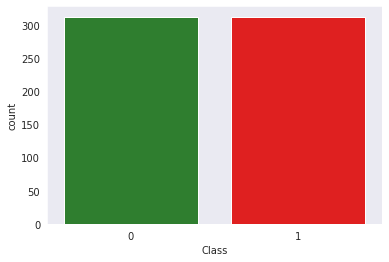

In [20]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_rus);



Com os dados balanceados, podemos ver a matriz de correlação e identificar quais variáveis estão mais fortemente relacionadas com as outras.

Observe como anteriormente, sem o balanceamento de dados, a matriz de correlação não trazia nenhuma informação relevante. Entretanto, ela traz muito mais informações após um correto balanceamento.

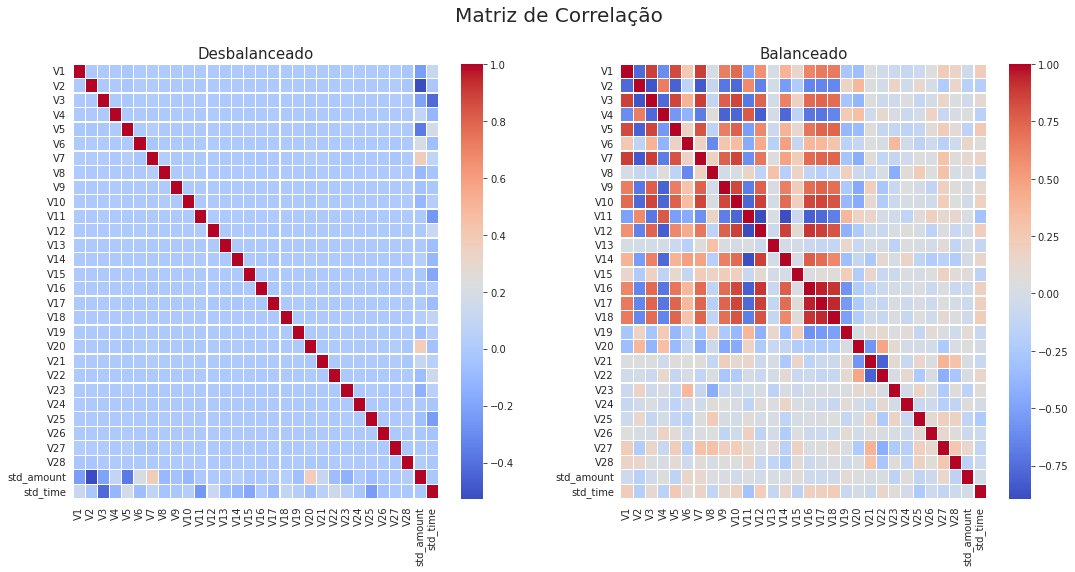

In [21]:
# plotar a matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação', fontsize = 20)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado', fontsize = 15)

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado', fontsize = 15)

plt.show()

Visualizando os dois gráficos acima, podemos ver que para o caso com amostra desbalanceada as variáveis parecem não possuir correlação, portanto não é útil para nosso modelo de IA. 

Já na amostra balanceada a correlação fica bem clara, evidenciando o grau de calor de relação entre as variáveis.

Ou seja, com os dados balanceados, nosso modelo de Machine Learning terá menos chance de erro, pois ele consegue entender melhor relação entre as variáveis.

## Modelos de *Machine Learning*

Com todos os dados preparados e após uma análise exploratória completa, irei construir dois modelos de ML e escolher baseado no que apresentar um melhor desempenho, que serão a **Regressão Logística** e a ***Decision Tree***, ou Árvore de Decisão.

Após instanciar o modelo, o mesmo será treinado em cima dos dados em `X_rus` e `y_rus`. Na sequência, serão realizadas as previsões sobre os dados de teste.

<p align=center>
<img src="https://portalerp.com/images/2019/04/24/how-to-develop-machine-learning-applications-for-business-featuredjpg.jpeg" width="60%"></p>

## Avaliando Modelos de Classificação


Seja trabalhando com classificação binária ou com diversas classes, as métricas relacionadas a modelos de classificação não podem ser os mesmos que usamos em modelos de regressão.

### Matriz de Confusão

Uma das principais maneiras de você verificar o desempenho do seu algoritmo é por meio da Matriz de Confusão. Para cada classe, ela informa quais os valores reais (*actual*) e os valores previstos pelo modelo (*predicted*). É um resumo dos resultados de previsão em um problema de classificação.

O número de previsões corretas e incorretas são resumidos com valores de contagem e divididos por cada classe. Esta é a chave para a matriz de confusão.

Ele fornece informações não apenas sobre os erros cometidos pelo seu classificador, mas, mais importante, sobre os tipos de erros que estão sendo cometidos.

<p align=center>
<img src="https://miro.medium.com/max/1400/1*OhEnS-T54Cz0YSTl_c3Dwg.jpeg" width="80%"></p>

Uma matriz de confusão é uma tabela que é frequentemente usada para descrever o desempenho de um modelo de classificação em um conjunto de dados de teste para os quais os valores verdadeiros são conhecidos. Todas as medidas, exceto AUC, podem ser calculadas usando os quatro parâmetros. 

Então, vamos falar sobre esses quatro parâmetros primeiro.

**Tipos de parâmetros:**

* **Verdadeiro positivo (*true positive* — TP):**  Estes são os valores positivos corretamente previstos, o que significa que o valor da classe real é sim e o valor da classe prevista também é sim; 

* **Verdadeiro negativo (*true negative* — TN):** Estes são os valores negativos corretamente previstos, o que significa que o valor da classe real é não e o valor da classe prevista também é não;

* **Falso positivo (*false positive* — FP):** Quando a classe real é não e a classe prevista é sim; 

* **Falso negativo (*false negative* — FN):** Quando a classe real é sim, mas a classe prevista é não.

Falsos positivos e falsos negativos, esses valores ocorrem quando sua classe real contradiz a classe prevista.

Com esses conceitos, vamos dar uma olhada em outras métricas.

### AUC

O valor do **AUC** varia de 0,0 até 1,0 e o limiar entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe. Quanto **maior** o AUC, **melhor**. 

O interessante do AUC é que a métrica é invariante em escala, uma vez que trabalha com precisão das classificações ao invés de seus valores absolutos. Além disso, também mede a qualidade das previsões do modelo, independentemente do limiar de classificação.

### *Accuracy*

Definitivamente, é a métrica mais intuitiva e fácil para se entender. A acurácia mostra diretamente a porcentagem de acertos do nosso modelo.

<p align=center>
<img src="https://miro.medium.com/max/1400/1*gFW6rXbctrhWHxD8OXi4wg.png" width="80%"></p>


Apesar de ser muito direta e intuitiva, a acurácia não é uma boa métrica quando você lida, por exemplo, com dados desbalanceados.

Neste *dataset* de fraudes bancárias, o número de eventos classificados como fraude é inferior a 1%. Ou seja, a acurácia do modelo será superior para os casos de não-fraude e não retratará bem a natureza do nosso problema.

Para casos, de dados desbalanceados, o ideal é separar os erros em diferentes tipos, e não apenas usar uma métrica global de acurácia.



### *Precision*

A precisão diz respeito à quantidade (proporcional) de identificações positivas feita corretamente, e é obtida pela equação:

<p align=center>
<img src="https://miro.medium.com/max/888/1*C3ctNdO0mde9fa1PFsCVqA.png" width="80%"></p>

<p align=center>
<img src="https://miro.medium.com/max/1400/1*PULzWEven_XAZjiMNizDCg.png" width="80%"></p>

* * Verdadeiro Positivo + Falso Positivo = Total Previsto Positivo

Precisão é a medida de desempenho mais intuitiva e é simplesmente uma proporção da observação prevista corretamente para o total de observações. Pode-se pensar que, se tivermos alta precisão, nosso modelo será o melhor. Sim, a precisão é uma ótima medida, mas apenas quando você tem conjuntos de dados simétricos em que os valores de falsos positivos e falsos negativos são quase os mesmos. Portanto, você deve observar outros parâmetros para avaliar o desempenho do seu modelo.


### *Recall*

Mostra a proporção de positivos encontrados corretamente. Matematicamente, você pode calcular o *recall* da seguinte maneira:

<p align=center>
<img src="https://miro.medium.com/max/836/1*dXkDleGhA-jjZmZ1BlYKXg.png" width="80%"></p>

<p align=center>
<img src="https://miro.medium.com/max/1400/1*BBhWQC-m0CLN4sVJ0h5fJQ.jpeg" width="80%"></p>

* * Verdadeiro Positivo + Falso Negativo = Real Positivo


### *F1-score*

É a média harmonica entre precisão e *recall*. O melhor valor possível para o *F1-score* é 1 e o pior é 0. Portanto, essa pontuação leva em consideração tanto os falsos positivos quanto os falsos negativos. É calculado por:



<p align=center>
<img src="https://miro.medium.com/max/564/1*T6kVUKxG_Z4V5Fm1UXhEIw.png"width="80%"></p>

Intuitivamente, não é tão fácil de entender quanto a precisão, mas a *F1-score* pode ser uma medida melhor a ser usada se precisarmos buscar um equilíbrio entre Precisão e *Recall* e houver uma distribuição de classes desigual (grande número de Negativos Reais). 

# Regressão Logística

A Regressão Logística é um algoritmo de Aprendizado de Máquina que é utilizado para os problemas de classificação, é um algoritmo de análise preditiva e baseado no conceito de probabilidade.

Quais são os tipos de regressão logística:

* Binário (por exemplo, tumor maligno ou benigno);
* Funções multilineares *failClass* (por exemplo, gatos, cachorros ou ovelhas).



<p align=center>
<img src="https://miro.medium.com/max/1400/1*dm6ZaX5fuSmuVvM4Ds-vcg.jpeg" width="80%"></p>

* * *Gráfico Regressão Linear VS Regressão Logística| Imagem: Data Camp*

Podemos chamar uma Regressão Logística de modelo de Regressão Linear, mas a Regressão Logística usa uma função de custo mais complexa, esta função de custo pode ser definida como a ' função sigmóide ' ou também conhecida como 'função logística' em vez de uma função linear.

Para mapear valores previstos para probabilidades, usamos a função *Sigmoid*. A função mapeia qualquer valor real em outro valor entre 0 e 1. No aprendizado de máquina, usamos *sigmoid* para mapear previsões para probabilidades. 

Para mais informações, [clicar aqui]('https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148').

In [22]:
# instanciar e treinar um modelo de Regressão Logística
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

Com o modelo treinado e as previsões feitas, parte-se para a avaliação do desempenho.

Neste tipo de problema, originalmente desbalanceado, a acurácia não é uma métrica adequada. Conforme explicado por *Carlos Melo* [neste artigo](http://sigmoidal.ai/como-lidar-com-dados-desbalanceados/), você pode ter uma acurácia de 99,88% e detectar menos de 60% das fraudes.

Observe a matriz de confusão para ver a taxa de acertos para transações fraudulentas, ou pela coluna *recall* do Relatório de Classificação. 

Uma outra métrica considerada interessante para se avaliar a eficácia é a [AUC ROC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772), ou área sob a curva. No caso desse modelo de Regressão Logística, tem-se 93% de AUC.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9613    0.9802     60417
           1     0.0402    0.9333    0.0771       105

    accuracy                         0.9613     60522
   macro avg     0.5201    0.9473    0.5287     60522
weighted avg     0.9982    0.9613    0.9786     60522

Acurácia: 0.9613

AUC: 0.9473



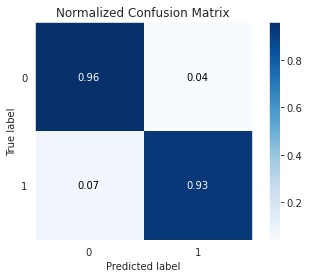

In [23]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

## Fazendo Previsões no Conjunto de Teste

No começo do projeto, realizamos um *split* nos dados para que tivéssemos 3 conjuntos: Um de treino, um de validação e um de teste. 

Agora que já exploramos e preparamos os dados, instanciamos o modelo e fizemos previsões no conjunto de validação, é hora de descobrirmos o potencial desse simples modelo com os dados de teste.

O que faremos é apenas utilizar o modelo que treinamos com um novo conjunto. Mas, para que os resultados sejam justos, precisamos fazer com que os novos dados estejam nas mesmas condições daqueles que o nosso modelo espera.

Nesse caso, precisamos padronizar as colunas `Time` e `Amount`. Não podemos balancear os dados pois haveria perda. Nosso modelo precisa ser tratado mas precisamos fazer previsões em todas as linhas que ele receber.

In [24]:
# padronizar as colunas Time e Amount - Teste
test_clean = test.copy()

std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
test_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


Agora basta separar entre X e Y, e fazer nossas previsões.

In [25]:
# separar variáveis entre X e y
X_test = test_clean.drop('Class', axis=1)
y_test = test_clean['Class']

In [26]:
# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

Pronto! Com nossas previsões feitas, é hora de visualizar os resultados.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9634    0.9813     42647
           1     0.0417    0.9189    0.0799        74

    accuracy                         0.9633     42721
   macro avg     0.5208    0.9412    0.5306     42721
weighted avg     0.9982    0.9633    0.9797     42721

Acurácia: 0.9633

AUC: 0.9412



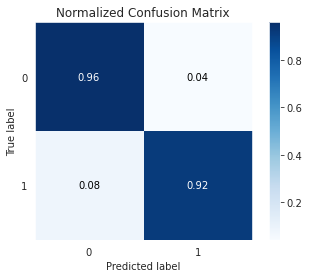

In [27]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

A ótima noticia é que os padrões detectados pelo algoritmo de machine learning no conjunto de treino, apresentou mais de 90% de Acurácia e AUC nos dados de teste.

# *Decision Tree*

É um algoritmo de aprendizado supervisionado para *Machine Learning*, e pode ser usado tanto para classificação quanto para regressão.

Uma *Decision Tree* é construída a partir de um processo de indução, que vai dividindo os dados em subconjuntos cada vez mais puros. Para selecionar os atributos que irão compor a árvore, são considerados o grau de entropia de um nó e a informação ganha a mais após um *split*.

In [28]:
# importar modelo Decision Tree 
from sklearn.tree import DecisionTreeClassifier

# instanciar e treinar o modelo de Decision Tree
model_tree = DecisionTreeClassifier(max_depth=3)
model_tree.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de teste
y_pred_tree = model_tree.predict(X_val)
y_proba_tree = model_tree.predict_proba(X_val)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9668    0.9830     60417
           1     0.0456    0.9143    0.0869       105

    accuracy                         0.9667     60522
   macro avg     0.5227    0.9405    0.5350     60522
weighted avg     0.9982    0.9667    0.9815     60522

Acurácia: 0.9667

AUC: 0.9405



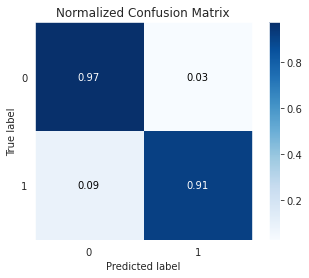

In [29]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred_tree, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred_tree, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred_tree)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred_tree)))

Vamos ver como foi o desempenho do modelo em cima do nosso conjunto de testes.

In [30]:
# fazer as previsões em cima dos dados de teste
y_pred_tree = model_tree.predict(X_test)
y_proba_tree = model_tree.predict_proba(X_test)

Vamos olhar o relatório de classificação e a matriz de confusão.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9668    0.9830     42647
           1     0.0445    0.8919    0.0847        74

    accuracy                         0.9666     42721
   macro avg     0.5221    0.9293    0.5339     42721
weighted avg     0.9982    0.9666    0.9814     42721

Acurácia: 0.9666

AUC: 0.9293



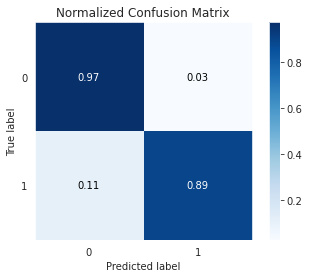

In [31]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_tree, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_tree)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_tree)))

É possível também visualizar como ficou a nossa árvore, criando um dot e desenhando ele usando as bibliotecas abaixo.

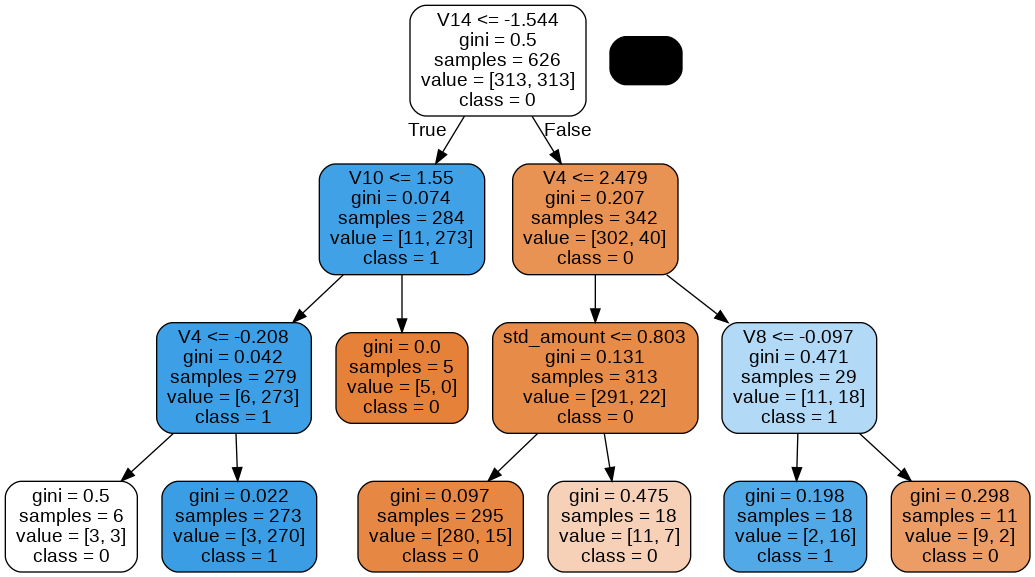

In [32]:
# importar bibliotecas
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# criar DOT 
dot = export_graphviz(model_tree, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['0', '1'])

# plotar
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

### Resultados das métricas ✅

Regressão Logística:

* Acurácia: 95,79%

* AUC: 95,19%

*Decision Tree*:

* Acurácia: 96,17%

* AUC: 93,36%




##Conclusão❗

Neste projeto, como você pode observar, não se trata de um problema simples. Apesar dos dados estarem bem tratados e limpos, sem valores ausentes ou variáveis categóricas, com a técnica de PCA aplicada, tivemos um trabalho relevante no balanceamento e na identificação de padrões dos dados.

Utilizamos dois modelos de *Machine Learning*: **Regressão Logística** e ***Decision Tree***. Ambos os modelos de classificação nos mostraram desempenho global muito semelhante e adequado. Enquanto a acurácia da *Decision Tree* apresentou desempenho relativamente superior, em contrapartida a AUC da Regressão Logística ficou melhor. Temos também as métricas como a precisão, a *recall* e a *F1-score* que obtiveram resultados bem similares, fazendo dos dois modelos boas soluções para o problema em questão.

Apesar do bom resultado final, vale ressaltar, que há espaço para testar o desempenho com outros algoritmos de classificação, além da otimização dos hiperparâmetros, que pode diminuir as chances de *overfitting* do modelo, com o objetivo final de ampliar a detecção de fraudes e assim preveni-las.

<p align=center>
<img src="https://www.securityreport.com.br/wp-content/uploads/2021/07/2-7.jpg" width="80%"></p>



